# Exercise 1 - Overview

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, 
* formulate a null and alternative hypothesis (be as specific as you can be), 
* then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. 

It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?

#### T-Test

DISCREAT: Switched Providers New/Old
```vs```
CONTINUOUS: Mean of Latency

$H_{0}$: Mean of Latency.Old <= Mean of Latency.New

$H_{a}$: Mean of Latency.Old > Mean of Latency.New

True Pos: Rejected H0 and H0 was False (our True was True)
"Latency went up and we said it did"

True Neg: Accept the H0 and H0 is True (our False was True) 
"Latency went did not go up and we said it did not"

Type I Error: Rejected the H0 BUT the H0 was True (our True was False; No Wolf)
We rejected the NULL statement BUT it was NULL

Type II Error: Accept H0 BUT H0 is False (our False was True; We didn't believe in the Wolf BUT he was Real)
We accepted the NULL BUT it was not NULL

### WRONG

Chi-Squared 
```=``` 
DISCREAT: Latency up True/False 
```vs```
DISCREAT: Switched Providers New/Old

H0: Network Latency is NOT Relational to new Service Provider

Ha: Network Latency is Relational to new Service Provider

True Pos: Rejected H0 and H0 was False (our True was True)
"There is a Significant Relationship between the increase of Latency and our switch to a New Service Provider"

True Neg: Accept the H0 and H0 is True (our False was True) 
"There was little evidence of a Relationship between the increase of Latency and our switch to a New Service Provider"

Type I Error: Rejected the H0 BUT the H0 was True (our True was False; No Wolf)
We rejected the NULL statement BUT it was NULL

Type II Error: Accept H0 BUT H0 is False (our False was True; We didn't believe in the Wolf BUT he was Real)
We accepted the NULL BUT it was not NULL

2. Is the website redesign any good?

Pearson's R 
```=``` 
CONTINUOUS:  
```vs```
CONTINUOUS: 

H0:

Ha:

True Pos:

True Neg:

Type I Error:

Type II Error:

3. Is our television ad driving more sales?

### T-Test

DISCREAT: Add Before/After
```vs```
CONTINUOUS: Mean of Sales

$H_{0}$: Mean of Sales.Before <= Mean of Sales.After

$H_{a}$: Mean of Sales.Before > Mean of Sales.After

True Pos: Rejected H0 and H0 was False (our True was True)
* "Sales increased after the Ad aired"
* We said it was True AND it was True
* We said it was Positive AND it was Positive

True Neg: Accept the H0 and H0 is True (our False was True) 
* "Sales did not increase after Ad aired"
* We said it was False AND it was False
* We said it was Negative AND it was Negative

Type I Error: Rejected the H0 BUT the H0 was True (our True was False; No Wolf)
* We rejected the NULL statement BUT it was NULL
* We said it was True BUT it was False
* We said it was Positive BUT it was Negative

Type II Error: Accept H0 BUT H0 is False (our False was True; We didn't believe in the Wolf BUT he was Real)
* We accepted the NULL BUT it was not NULL
* We said it was False BUT it was True
* We said it was Negative BUT it was Positive

#### WRONG

Chi-Squared 
```=``` 
DISCREAT: Television Ad airs Before/After 
```vs```
DISCREAT: Sales increase True/False

H0: Airing the Ad has no Relation to an increase in sales

Ha: Airing the Ad has a Relation to an increase in sales

True Pos: Rejected H0 and H0 was False (our True was True)
"There is a Significant Relationship between the Airing of the Ad and an Increase in Sales."

True Neg: Accept the H0 and H0 is True (our False was True)
"There is little to no Relationship between the Airing of the Ad and an Increase in Sales."

Type I Error: We said there is a relationship BUT there is NOT

Type II Error: We said there is NO relationship and there was.

# Exercise 2 - T-Test

Continue working in your ```hypothesis_testing``` notebook.

In [55]:
import pandas as pd

from math import sqrt
import numpy as np
import scipy.stats as stats
import statistics

from pydataset import data

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

### 1. Answer with the type of test you would use (assume normal distribution):

### 1.1 Is there a difference in grades of students on the second floor compared to grades of all students?

#### ANSWER:
One-Sample T-test

```2nd_floor_grades.mean``` == ```all_grades.mean```
* One-Sample Mean vs Population Mean
* One Sample T-test
* 2-Tailed test ($H_{0}$ = Significantly Different ```== | !=```)

### 1.2 Are adults who drink milk taller than adults who dont drink milk?

#### ANSWER:
Independent T-Test (a.k.a. Two Sample T-Test)

```milk_drinkers.mean.height``` > ```non-milk_drinkers.mean.height```
* 1-tailed test ($H_{a}$ = Significantly higher or lower ```> | <=```)

### 1.3 Is the the price of gas higher in texas or in new mexico?

#### ANSWER:
Independent T-Test (a.k.a. Two Sample T-Test)

```texas_gas_price.mean``` > ```new_mexico_gas_price.mean```
* 1-tailed test ($H_{a}$ = Significantly higher or lower ```> | <=```)

### 1.4 Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

#### ANSWER:
ANOVA Analysis of Variance & Kruskal Wallis Test
* Goal: Compare means of groups a, b & c.
* Verify Assumptions: If assumptions are met, use ANOVA, if not, use Kruskall Wallis

```ds_stress.mean``` == ```wd_stress.mean``` == ```cloud_stress.mean```

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
* A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
* A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
* Use a .05 level of significance.

**A. Plot Distribution**

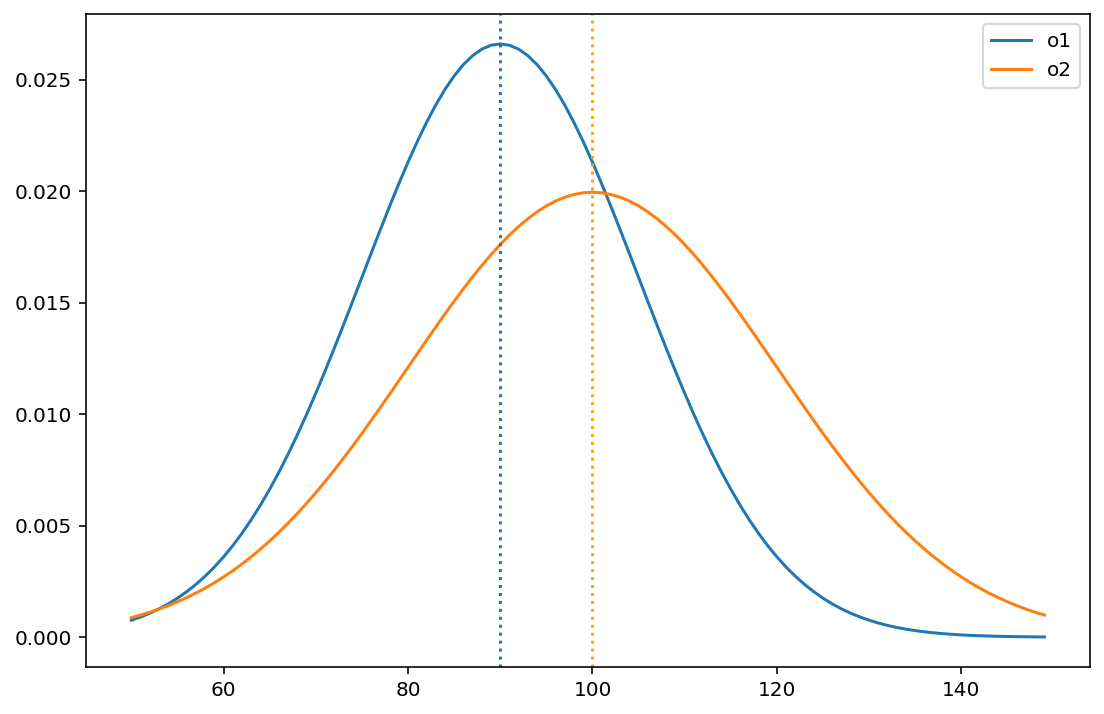

In [56]:
x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'o1')
plt.plot(x, y2, label = 'o2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

**B. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Different = Two Tails**


* One Sample or Two Samples?\
 **Two Samples (o1, o2)**


* Continuous or Discreat?\
 **Discreat (o1, o2) vs Continuous (avg time) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: Office #1 Sales average ```equals``` Office #2 Sales average**\
 ```o1_sales_time.mean``` == ```o2_sales_time.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: Office #1 Sales average is ```different than``` Office #2 Sales average**\
 ```o1_sales_time.mean``` != ```o2_sales_time.mean```

**C. Set Alpha**
* remember that our confidence level determines our alpha, 
* which we use to compare to p

In [57]:
α = 0.05

**D. Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [58]:
# np.random.normal(loc = 'mean', scale = 'std', size = '(columns, rows)')
o1 = np.random.normal(loc = 90, scale = 15, size = (40))
o2 = np.random.normal(loc = 100, scale = 20, size = (50))

# o1 = stats.norm(90, 15).rvs(40) 
# o1 = stats.norm(100, 20).rvs(50)

In [59]:
print(o1.var())
print(o2.var())

165.76556601376873
420.65758860838787


In [63]:
stat, p_val = stats.levene(o1, o2)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
else:
    print('equal_var = True (we will assume equal variance)')

equal_var = False (we cannot assume equal variance)


**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [64]:
#Using Scipy 

t_stat, p_val = stats.ttest_ind(o1, o2, equal_var = False)
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

t-stat: -4.097654034884477
p-value: 9.601221739469066e-05


### But we used random values?

We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this. In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.

T-test using descriptive stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

In [68]:
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

t-stat: -2.7091418459143854
p-value: 9.601221739469066e-05


**F. DECIDE (Is p-value less than alpha?)**
* implications of one-tailed two-sampled t-test:
* p will be divided by two because we are only looking at one tail of the curve
* we will pay attention to the sign of our t-statistic
* t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b

In [72]:
"""
# One-Tail
if (t > 0) and ((p / 2) < a):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""

# Two-Tail
if p_val < a:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


### 3. Load the ```mpg``` dataset and use it to answer the following questions:

### 3.1 Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

### 3.2 Are compact cars more fuel-efficient than the average car?

### 3.3 Do manual cars get better gas mileage than automatic cars?

One Tail or Two Tails?

One Sample or Two Samples?

Continuous or Discreat?

$H_0$: The opposite of what I am trying to prove

$H_a$: What am I trying to prove

# Exercise 3 - Correlation
Continue working in your ```hypothesis_testing``` notebook.

### 1. Answer with the type of stats test you would use (assume normal distribution):

### 1.1 Is there a relationship between the length of your arm and the length of your foot?

### 1.2 Do guys and gals quit their jobs at the same rate?

### 1.3 Does the length of time of the lecture correlate with a students grade?

### 2. Use the ```telco_churn``` data.

### 2.1 Does tenure correlate with monthly charges?

### 2.2 Total charges?

### 2.3 What happens if you control for phone and internet service?

### 3. Use the ```employees``` database.

### 3.1 Is there a relationship between how long an employee has been with the company and their salary?

**B. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Different = Two Tails**


* One Sample or Two Samples?\
 **Two Samples (o1, o2)**


* Continuous or Discreat?\
 **Continuous (Tenure) vs Continuous (Salary) = Pearson's R**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: There is no ```linear relationship``` between employee Tenure and Salary**\
 ```employee.tenure.mean``` and ```employee.salary.mean``` are NOT linear


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: There is a ```linear relationship``` between employee Tenure and Salary**\
 ```o1_sales_time.mean``` and ```o2_sales_time.mean``` are linear

### 3.2 Is there a relationship between how long an employee has been with the company and the number of titles they have had?

### 4. Use the ```sleepstudy``` data.

### 4.1 Is there a relationship between days and reaction time?

# Exercise 4 - Chi Squared

Continue working in your ```hypothesis_testing``` notebook.

### 1. Answer with the type of stats test you would use (assume normal distribution):

### 1.1 Do students get better test grades if they have a rubber duck on their desk?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **One_Tail = with_Duckie.grades.mean > without_Duckie.grades.mean**


* One Sample or Two Samples?\
 **Two Samples (with, without)**


* Continuous or Discreat?\
 **Discreat (Rubber Duckie) vs Continuous (Test Grades) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


### 1.2 Does smoking affect when or not someone has lung cancer?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_tails = Smoker == Cancer**


* One Sample or Two Samples?\
 **Two Samples (Smoker, Cancer)**


* Continuous or Discreat?\
 **Discreat (Smoker) vs Discreat (Cancer) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.3 Is gender independent of a person’s blood type?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Gender == Blood Type**


* One Sample or Two Samples?\
 **Two Samples (Gender, Blood Type)**


* Continuous or Discreat?\
 **Discreat (Gender) vs Discreat (Blood Type) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.4 A farming company wants to know if a new fertilizer has improved crop yield or not

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **One_Tail = New_Fertilizer.Crop_Yield.mean > Old_Fertilizer.Crop_Yield.mean**


* One Sample or Two Samples?\
 **Two Samples (New, Old)**


* Continuous or Discreat?\
 **Discreat (New Fertilizer) vs Continuous (Crop Yield) = T-Test**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.5 Does the length of time of the lecture correlate with a students grade?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **NO TAIL**


* One Sample or Two Samples?\
 **Two Samples (Lecture_Time, Float_Grade)**


* Continuous or Discreat?\
 **Continuous (Lecture Time) vs Continuous (Float Grade) = Pearson's R**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 1.6 Do people with dogs live in apartments more than people with cats?

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **One_Tail = Dogs > Cats**


* One Sample or Two Samples?\
 **Two Samples (Pet_Type, Apartment_Bool)**


* Continuous or Discreat?\
 **Discreat (Dog, Cat) vs Discreat (Apartment_Bool) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's R = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```

### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


||Codeup Student|Not Codeup Student||
|---|---|---|---|
|Uses a Macbook|49|20|
|Doesn't Use A Macbook|1|30|


**B. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Two_Tails = Student == MacBook**


* One Sample or Two Samples?\
 **Two Samples (Student, MacBook)**


* Continuous or Discreat?\
 **Discreat (Student) vs Discreat (MacBook) = $Chi^2$**
    * T-Test = ```Discreat``` vs ```Continuous```
    * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
    * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: Using a MacBook is ```dependant``` of being a Codeup Student**\
 ```MacBook_True.mean``` == ```Codeup_Student.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: Using a MacBook is **NOT** ```dependant``` of being a Codeup Student**\
 ```MacBook_True.mean``` != ```Codeup_Student.mean```

In [104]:
observed = ([49,20],[1,30])
observed

([49, 20], [1, 30])

In [105]:
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [106]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [107]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 1.4116760526193828e-09


In [109]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### 3. Choose another 2 categorical variables from the ```mpg``` dataset and perform a $chi^{2}$ contingency table test with them. Be sure to state your null and alternative hypotheses.

### 4. Use the data from the ```employees``` database to answer these questions:

### 4.1 Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

**B. Set Hypothesis**

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **Different = Two Tails**


* One Sample or Two Samples?\
 **Two Samples (o1, o2)**


* Continuous or Discreat?\
 **Discreat (gender) vs Discreat (sales, marketing) = $Chi^2$**
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson's = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\
 **$H_{0}$: Office #1 Sales average ```equals``` Office #2 Sales average**\
 ```o1_sales_time.mean``` == ```o2_sales_time.mean```


* $𝐻_𝑎$: What am I trying to prove\
 **$H_{a}$: Office #1 Sales average is ```different than``` Office #2 Sales average**\
 ```o1_sales_time.mean``` != ```o2_sales_time.mean```

### 4.2 Is an employee's gender independent of whether or not they are or have been a manager?